In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from keras.datasets import mnist

In [8]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data(path = "./data")

View Mnist Data

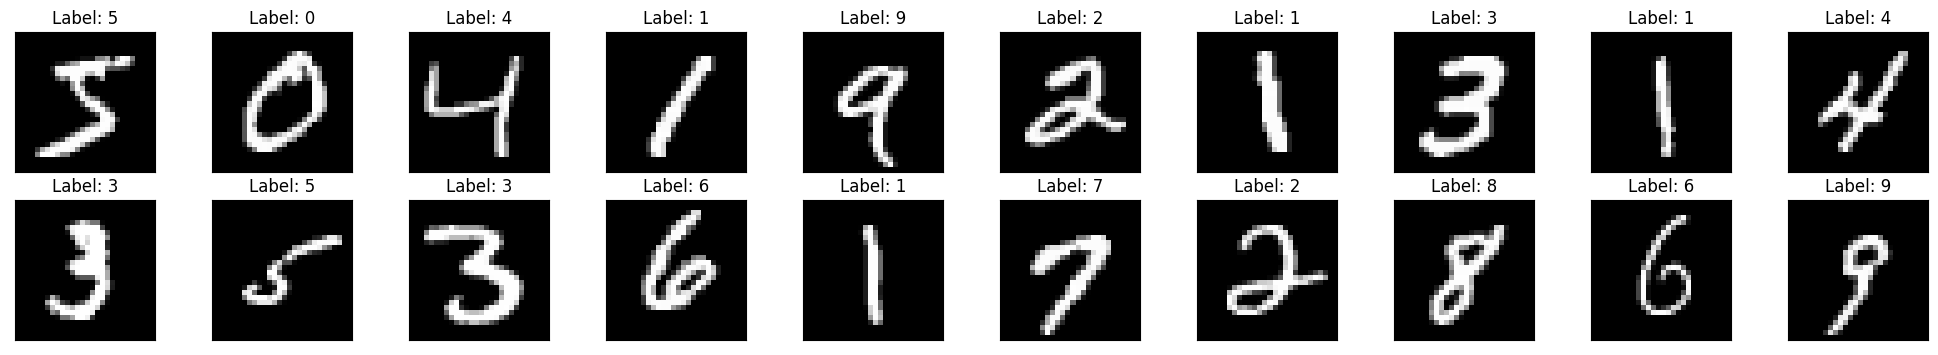

In [51]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(train_data[idx], cmap='gray')
    ax.set_title(f"Label: {train_labels[idx]}")



More Details in Data

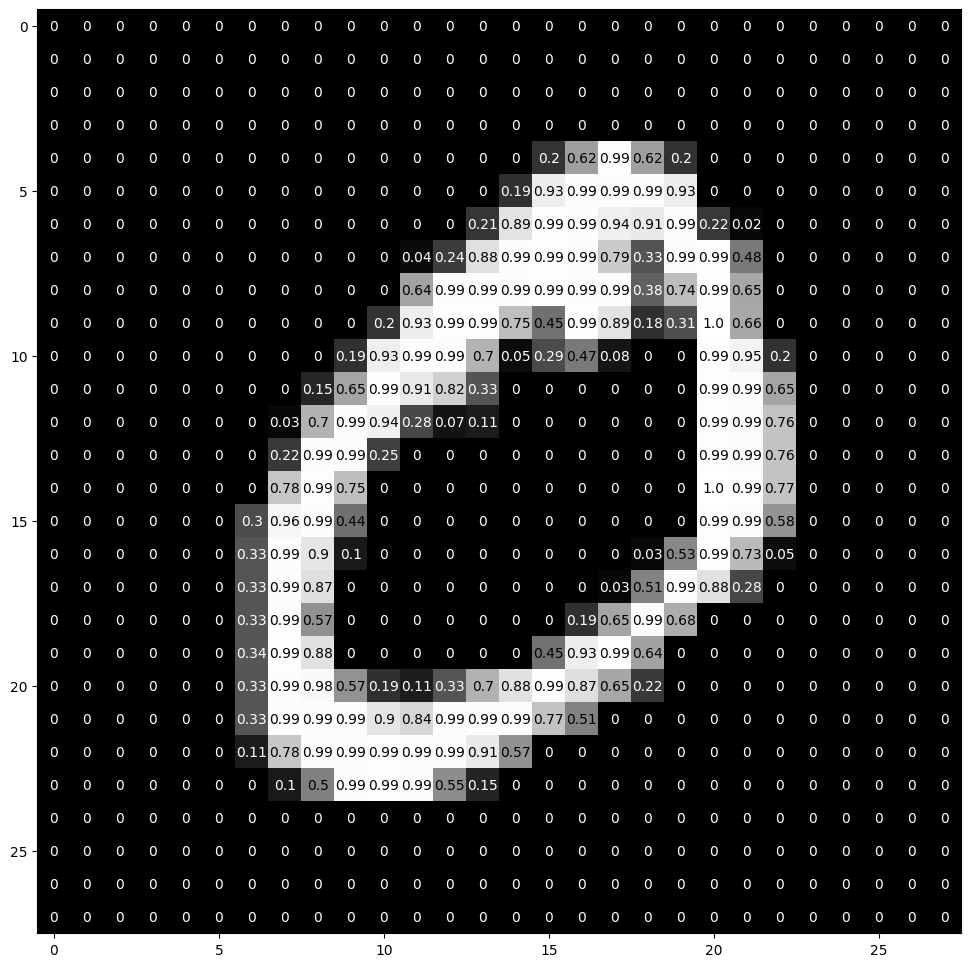

In [53]:
# Preprocessing data
train_data = train_data/255.0
test_data = test_data/255.0


img = np.squeeze(train_data[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [79]:
# Define MLP Model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [83]:
# Complie Model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
history = model.fit(train_data, train_labels, epochs=15, validation_data=(test_data, test_labels))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0840 - val_accuracy: 0.9815
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.1057 - val_accuracy: 0.9769
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0161 - accuracy: 0.9948 - val_loss: 0.0848 - val_accuracy: 0.9824
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0897 - val_accuracy: 0.9819
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.1061 - val_accuracy: 0.9788
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.1088 - val_accuracy: 0.9780
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0966 - val_accuracy:

In [86]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test Loss: {:.6f}'.format(test_loss))
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))

313/313 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9824
Test Loss: 0.103569
Test Accuracy: 98.24%


In [90]:
# 클래스별 정확도 계산
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

class_correct = np.zeros(10)
class_total = np.zeros(10)

for i in range(len(test_labels)):
    true_label = test_labels[i]
    predicted_label = predicted_labels[i]
    class_correct[true_label] += (true_label == predicted_label)
    class_total[true_label] += 1

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %.2f%% (%d/%d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            class_correct[i], class_total[i]))
    else:
        print('Test Accuracy of %5s: N/A (no test examples)' % (str(i)))

print('Test Accuracy (Overall): %.2f%% (%d/%d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

313/313 [==============================] - 0s 1ms/step
Test Accuracy of     0: 99.59% (976/980)
Test Accuracy of     1: 99.47% (1129/1135)
Test Accuracy of     2: 98.16% (1013/1032)
Test Accuracy of     3: 97.62% (986/1010)
Test Accuracy of     4: 96.23% (945/982)
Test Accuracy of     5: 98.32% (877/892)
Test Accuracy of     6: 98.23% (941/958)
Test Accuracy of     7: 98.25% (1010/1028)
Test Accuracy of     8: 97.95% (954/974)
Test Accuracy of     9: 98.41% (993/1009)
Test Accuracy (Overall): 98.24% (9824/10000)


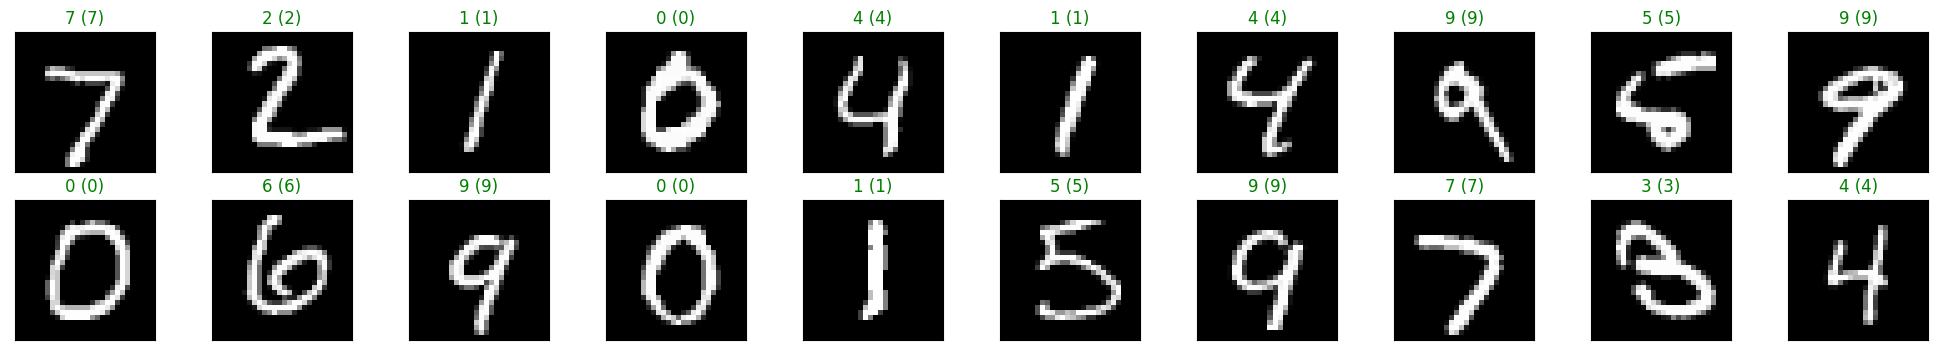

In [99]:
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_data[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(predicted_labels[idx]), str(test_labels[idx].item())),
                 color=("green" if predicted_labels[idx]==test_labels[idx] else "red"))